<a href="https://colab.research.google.com/github/ensemble-on/ChatterBot/blob/master/Copy_of_10_%ED%85%8D%EC%8A%A4%ED%8A%B8%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98(%EC%98%81%EC%96%B4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텍스트 이진분류 (영어 IMDB)

In [2]:
# from google.colab import auth
# auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# 경로 설정
imdb_dir = '/content/gdrive/My Drive/AIBM/20191016/pytest/aclImdb_v1_small/aclImdb/'

In [0]:
# Train Data Loading
import os
train_dir = os.path.join(imdb_dir, 'train')
labels = [] ; texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname), encoding='utf8')
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [5]:
# Data 확인
# 직접 작성

print('texts 0:', texts[0]) 
print('texts len:', len(texts))
print('labels 0:', labels[0]) 
print('labels len:', len(labels))

texts 0: Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.
texts len: 60
labels 0: 0
labels len: 60


In [6]:
# Data Tokenizing
# 텍스트에 사용된 단어의 종류를 빈도 순으로 정렬하는 작업을 수행한다
# 직접 작성

# 텍스트에 사용된 단어의 종류를 빈도 순으로 정렬하는 작업을 수행한다 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences 
import numpy as np 
import math

validation_ratio = math.floor(len(texts) * 0.3)  # 검증 샘플은 전체의 30%로 한다 
max_words = 10000               # 데이터셋에서 가장 빈도 높은 10,000 개의 단어만 사용한다 
maxlen = 200 # 항상 각 문장의 길이가 200 단어가 되도록 고정한다

tokenizer = Tokenizer(num_words=max_words) # 상위빈도 10,000 개의 단어만을 추려내는 Tokenizer 객체 생성 
tokenizer.fit_on_texts(texts)     # 단어 인덱스를 구축한다 
word_index = tokenizer.word_index # 단어 인덱스만 가져온다

Using TensorFlow backend.


In [7]:
# Tokenizing 결과 확인
print('전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print('word_index type: ', type(word_index))
print('word_index: ', word_index)

전체에서 2828개의 고유한 토큰을 찾았습니다.
word_index type:  <class 'dict'>
word_index:  {'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'br': 6, 'is': 7, 'in': 8, 'i': 9, 'this': 10, 'it': 11, 'that': 12, 'for': 13, 'film': 14, 'was': 15, 'are': 16, 'with': 17, 'but': 18, 'movie': 19, 'as': 20, 'you': 21, 'not': 22, 'at': 23, 'he': 24, 'on': 25, 'be': 26, 'one': 27, 'have': 28, 'an': 29, 'all': 30, 'his': 31, 'like': 32, 'good': 33, 'has': 34, 'or': 35, 'some': 36, 'just': 37, 'so': 38, 'even': 39, 'who': 40, 'by': 41, 'my': 42, 'story': 43, 'about': 44, 'from': 45, 'out': 46, 'time': 47, 'when': 48, "it's": 49, 'they': 50, 'very': 51, 'no': 52, 'really': 53, 'if': 54, 'acting': 55, 'there': 56, 'every': 57, 'him': 58, 'most': 59, 'more': 60, 'ever': 61, 'great': 62, 'other': 63, 'people': 64, 'how': 65, 'also': 66, 'her': 67, 'too': 68, 'would': 69, 'their': 70, 'your': 71, 'bad': 72, 'made': 73, 'what': 74, 'she': 75, 'stanley': 76, 'can': 77, 'had': 78, 'me': 79, 'make': 80, 'plot': 81, 'read': 82,

In [9]:
# Data Sequencing
# 문자를 숫자로 변환하는 작업을 수행한다
# 상위 빈도 10,000(max_words)개의 단어만 추출하여 word_index의 숫자 리스트로 변환한다.
# 직접 작성

data = tokenizer.texts_to_sequences(texts) # Tokenizer 결과가 여기서 반영된다.

print('data 0:', data[0])

print('texts 0:', texts[0]) # texts[0]의 본래 단어들

data 0: [43, 4, 3, 179, 40, 34, 1140, 308, 13, 3, 686, 494, 46, 17, 3, 1141, 142, 12, 7, 3, 687, 384, 4, 688, 495, 3, 1142, 689, 496, 7, 690, 90, 29, 691, 1143, 1144, 41, 1, 692, 1145, 4, 49, 1146, 309, 11, 693, 688, 1, 180, 47, 17, 52, 385, 1147, 1148, 254, 11, 37, 68, 181, 1149, 39, 216, 45, 1, 694, 106, 26, 690, 181, 1, 1150, 1151, 69, 80, 1152, 310, 695, 5, 3, 1153, 1154, 25, 3, 1155, 311, 49, 143, 144, 21, 255, 115, 17, 36, 33, 497, 41, 312, 62, 1156, 1157, 312, 386, 1158, 1159, 2, 1160, 1161, 77, 26, 123, 1162]
texts 0: Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader.

In [10]:
# Data Pading 연습
# 직접 작성

# Padding은 데이터의 길이를 고정시켜 준다 
# 지정된 길이에 모자라는 것은 0으로 채우고, 넘치는 것은 잘라낸다 
# 텐서의 크기를 맞춰준다 
# 단어의 선택은 뒤에서부터 하며, nested list를 2D 텐서(2차원 넘파이 배열)로 만든다

from keras.preprocessing.sequence import pad_sequences
sequences = [[1, 2, 3, 4, 5], [1, 2, 3, 4], [1]] # nested list 
padded = pad_sequences(sequences, maxlen=3) # 2D tensor 
print(padded)

[[3 4 5]
 [2 3 4]
 [0 0 1]]


In [11]:
# Data Pading
# 직접 작성

data = pad_sequences(data, maxlen=maxlen) 
print('data:', data) 
print('data 0:', data[0]) 
print(len(data[0]))

data: [[   0    0    0 ...   26  123 1162]
 [   2 1186    3 ...  161   10   19]
 [   0    0    0 ...  508   70  204]
 ...
 [   0    0    0 ... 2780   55 2781]
 [   0    0    0 ...  337 2799   86]
 [   0    0    0 ...   63  126   45]]
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0   43    4    3  179   40   34 1140  308   13    3
  686  494   46   17    3 1141  142   12    7    3  687  384    4  688
  495    3 1142  689  496    7  690   90   29  691 1143 1144   41    1
  692 1145    4   49 1146  309   11  693  688    1  180   47   17   52
  385 1147 1148  254   11   37   68  181 1149   

In [12]:
# One-Hot-Encoding 연습
# 직접 작성

# one-hot encoding은 모든 숫자를 0과 1로만 만든다 
sample = [[5, 6, 7], [8, 9, 10]]

arr = np.zeros((len(sample), 10+1)) # “10”은 11번째에 들어가게 되므로 11개의 공간을 만들어야 한다

for i, seq in enumerate(sample): # 리스트가 2개이므로 i는 총 2회(0, 1) 반복되며, 
    arr[i, seq] = 1. # 각 i에서 리스트의 number가 가리키는 곳에 1을 기록한다
arr

array([[0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [0]:
# One-Hot-Encoding
def to_one_hot(sequences, dimension):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

# data를 one-hot-인코딩으로 0과 1의 벡터로 변환 
# label은 이미 0과 1로 태깅되어 있으므로, list에서 넘파이 배열로만 변환. float32를 지정하지 않으면 int32로 저장된다 
data = to_one_hot(data, dimension=max_words) 
labels = np.asarray(labels).astype('float32')   

In [14]:
# One-Hot-Encoding 결과 확인

print('data:', data)
len(data[0])					# dimension=10000으로 했으므로 각 행은 10,000개를 가지고 있다
print('data [0][0:100]:', data[0][0:100])

print(word_index)

data: [[1. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]
data [0][0:100]: [1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'br': 6, 'is': 7, 'in': 8, 'i': 9, 'this': 10, 'it': 11, 'that': 12, 'for': 13, 'film': 14, 'was': 15, 'are': 16, 'with': 17, 'but': 18, 'movie': 19, 'as': 20, 'you': 21, 'not': 22, 'at': 23, 'he': 24, 'on': 25, 'be': 26, 'one': 27, 'have': 28, 'an': 29, 'all': 30, 'his': 31, 'like': 32, 'good': 33, 'has': 34, 'or': 35, 'some': 36, 'just': 37, 'so': 38, 'even': 39, 'who': 40, 'by': 41, 'my': 42, 'story': 43, 'about': 44, 'from': 45, 'out': 46, 'time': 47, 'when': 

In [15]:
# Train 데이터와 Validation 데이터 준비
# 직접 작성

print('데이터 텐서의 크기:', data.shape)  # (25000, 10000) 
print('레이블 텐서의 크기:', labels.shape) # (25000,) data와 label이 모두 2D 텐서가 되었음

indices = np.arange(data.shape[0]) # 0 ~ 24999 까지의 숫자를 생성 
np.random.shuffle(indices)     # 0 ~ 24999 까지의 숫자를 랜덤하게 섞음 
data = data[indices]    # 이것을 인덱스로 하여 2D 텐서 데이터를 섞음 
labels = labels[indices] # label도 같은 순서로 섞음

print(indices)

데이터 텐서의 크기: (60, 10000)
레이블 텐서의 크기: (60,)
[26 31 40 34 37 20 42  7 21 15 28 43 51 45 22 57 49 12  8 59  0 33 24 39
 53  2 27 14 25 52 35 30 36 46 29 47 50 41  6 23 13 16  1 17 58 55  4 54
 19 56 32  3 38 44  9 18 10  5 48 11]


In [0]:
# 훈련데이터와 검증데이터 분리
# 직접 작성

x_train = data[validation_ratio:] # 훈련데이터의 70%를 훈련데이터 
y_train = labels[validation_ratio:] # 훈련데이터의 70%를 훈련데이터 Label (data와 labels는 같은 순서)

x_val = data[:validation_ratio] # 훈련데이터의 30%를 검증데이터 
y_val = labels[:validation_ratio] # 훈련데이터의 30%를 검증데이터 Label

In [17]:
# 모델 정의하기
# 직접 작성

from keras.models import Sequential 
from keras.layers import Dense
model = Sequential()                                               # 모델을 새로 정의
#은닉노드의 수 활성화 함수 음을 0으로 만드는 relu 입력층에는 10,000 개 단어가 온다 

model.add(Dense(64, activation='relu', input_shape=(max_words,)))  # 첫 번째 은닉층 
model.add(Dense(32, activation='relu'))                            # 두 번째 은닉층 
model.add(Dense(1, activation='sigmoid'))                 # 출력층 

# 이진분류 문제이고 신경망의 출력이 확률로 나와야 하므로, 
# 0~1로 출력하는 sigmoid를 택하고, 노드는 1개로 하였다


In [18]:
# 모델 요약 출력
# 직접 작성

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 642,177
Trainable params: 642,177
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile & Train Model
# 모델 컴파일
# 가중치 업데이트 방법은 RMSprop을 사용하였다. 이동평균의 방법을 도입하여 조절해간다
# 신경망의 출력이 확률이므로 crossentropy를 사용하는 것이 최선이다
# crossentropy는 원본의 확률 분포와 예측의 확률 분포를 측정하여 조절해 간다
# 또한 이진 분류이므로 binary_crossentropy를 사용한다
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# 모델 훈련
# 32개씩 미니 배치를 만들어 10번의 epoch로 훈련한다. 보통 32개에서 시작하여 512개까지 중에서 찾는다
# 훈련 데이터로 훈련하고, 검증 데이터로 검증한다 
# 반환값의 history는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리이다
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))
history_dict = history.history

Train on 42 samples, validate on 18 samples
Epoch 1/30
42/42 [==============================] - 0s 8ms/step - loss: 0.0234 - acc: 1.0000 - val_loss: 0.4796 - val_acc: 0.7222
Epoch 2/30
42/42 [==============================] - 0s 724us/step - loss: 0.0078 - acc: 1.0000 - val_loss: 0.4377 - val_acc: 0.8889
Epoch 3/30
42/42 [==============================] - 0s 677us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.4185 - val_acc: 0.8333
Epoch 4/30
42/42 [==============================] - 0s 717us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.4134 - val_acc: 0.8333
Epoch 5/30
42/42 [==============================] - 0s 698us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.4123 - val_acc: 0.8333
Epoch 6/30
42/42 [==============================] - 0s 649us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4079 - val_acc: 0.8333
Epoch 7/30
42/42 [==============================] - 0s 683us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4024 - val_acc: 0.8333
Epoch 8/30
42/42 [================

In [20]:
# 경로 변경
cd /content/gdrive/My Drive/AIBM/20191016/pytest/

/content/gdrive/My Drive/AIBM/20191016/pytest


In [0]:
# Save Model
# multidimensional numpy arrays를 저장할 수 있는 h5 file(HDF) 포맷으로 저장한다
model.save('text_binary_model.h5')


# 훈련데이터에서 사용된 상위빈도 10,000개의 단어로 된 Tokenizer 저장
# 새로 입력되는 문장에서도 같은 단어가 추출되게 한다
import pickle
with open('text_binary_tokenizer.pickle', 'wb') as handle:
  pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [36]:
# Accuracy & Loss 확인
# history 딕셔너리 안에 있는 정확도와 손실값을 가져와 본다
# 직접 작성

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

print('Accuracy of each epoch:', acc) # [0.79, 0.90, 0.93, 0.94, 0.96, 0.97, 0.98, 0.98, 0.98, 0.99] 
epochs = range(1, len(acc) +1) # range(1, 11)

Accuracy of each epoch: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


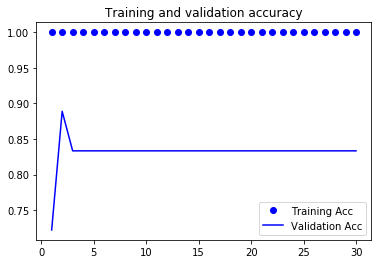

In [37]:
# Plotting Accuracy
# 직접 작성

import matplotlib.pyplot as plt

# 훈련데이터의 정확도에 비해 검증데이터의 정확도는 낮게 나타난다 
# epoch가 늘어나면 모델은 훈련데이터에 매우 민감해져(과대적합) 오히려 새로운 데이터를 잘 못 맞춘다 

plt.plot(epochs, acc, 'bo', label='Training Acc') 
plt.plot(epochs, val_acc, 'b', label='Validation Acc') 
plt.title('Training and validation accuracy') 
plt.legend() 

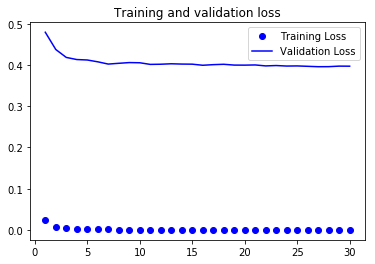

In [38]:
# Plotting Loss
# 직접 작성

plt.figure()    # 새로운 그림을 그린다
# 훈련데이터의 손실값은 낮아지나, 검증데이터의 손실값은 높아진다 
# 손실값은 오류값을 말한다. 예측과 정답의 차이를 거리 계산으로 구한 값이다 

plt.plot(epochs, loss, 'bo', label='Training Loss') 
plt.plot(epochs, val_loss, 'b', label='Validation Loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()

In [39]:
# Load Model
import os
from keras.models import load_model

filepath = '/content/gdrive/My Drive/AIBM/20191016/pytest/'
os.chdir(filepath)
print("Current Directory:", os.getcwd())

loaded_model = load_model('text_binary_model.h5')
print("model loaded:", loaded_model)

with open('text_binary_tokenizer.pickle', 'rb') as handle:
  loaded_tokenizer = pickle.load(handle)

Current Directory: /content/gdrive/My Drive/AIBM/20191016/pytest
model loaded: <keras.engine.sequential.Sequential object at 0x7fd39f659da0>


In [0]:
# Test Data Loading
test_dir = os.path.join(imdb_dir, 'test')
labels = [] ; texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname), encoding='utf8')
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [41]:
# Data 확인
print('texts:', texts[0])
print('texts len:', len(texts))

texts: Wow, another Kevin Costner hero movie. Postman, Tin Cup, Waterworld, Bodyguard, Wyatt Earp, Robin Hood, even that baseball movie. Seems like he makes movies specifically to be the center of attention. The characters are almost always the same ... the heroics, the flaws, the greatness, the fall, the redemption. Yup, within the 1st 5 minutes of the movie, we're all supposed to be in awe of his character, and it builds up more and more from there.<br /><br />And this time the story ... story? ... is just a collage of different movies. You don't need a spoiler; you've seen this movie several times, though it had different titles. You'll know what will happen way before it happens. This is like mixing An Officer and a Gentleman with Backdraft, but both are easily better movies. Watch Backdraft to see how this kind of movie should be made ... and also to see how an good but slightly underrated actor, Russell, plays the hero.
texts len: 20


In [0]:
# Data Sequencing
# 직접 작성

# 문자열을 word_index의 숫자 리스트로 변환 
data = loaded_tokenizer.texts_to_sequences(texts)

# padding으로 문자열의 길이를 고정시킨다 
data = pad_sequences(data, maxlen=maxlen) 

# test 데이터를 원-핫 인코딩한다 
x_test = to_one_hot(data, dimension=max_words)

# label을 list에서 넘파이 배열로 변환. 결과가 0 또는 1만 나오므로 이와같이 int32로 저장해도 된다. 
y_test = np.asarray(labels)

In [43]:
# Test Data Evaluation
test_eval = loaded_model.evaluate(x_test, y_test)	  # 모델에 분류할 데이터와 그 정답을 같이 넣어준다
print('prediction model loss & acc:', test_eval)		# 모델이 분류한 결과와 입력된 정답을 비교한 결과

20/20 [==============================] - 0s 5ms/step
prediction model loss & acc: [0.8700741529464722, 0.6000000238418579]


In [44]:
# 1개 데이터 예측
# 직접 작성

text = ["Hi, this is a test sentence."]                              # 데이터를 list 타입으로 만든다 
data = loaded_tokenizer.texts_to_sequences(text)
data = pad_sequences(data, maxlen=maxlen) 
x_test = to_one_hot(data, dimension=max_words)

prediction = loaded_model.predict(x_test) 
print("Result:", prediction) # [[0.57845604]]. 1이 될 확률이 57.8%

Result: [[0.6138221]]
